In [97]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

## Load dataset

In [98]:
#file_path = os.path.join("Downloads","WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [99]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [100]:
df=data.copy()
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Summarize the data

In [101]:
df.shape

(7043, 21)

#### This dataset have 7043 rows and 21 features/columns

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
# convert the categorical column "TotalCharges" to Numerical
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")


# Exploring datatypes of each features
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking Missing/null values

In [104]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [105]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["tenure"]*df["MonthlyCharges"])

### Again check null values

In [106]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Renaming some columns 

In [107]:
df.rename(columns={'gender':'Gender', 
                   'customerID':'CustomerID', 
                   'Contract':'ContractType', 
                   'InternetService':'InternetServiceType', 
                   'tenure':'Tenure'},inplace=True)

## Drop columns

In [108]:
df.drop(["CustomerID"],axis=1,inplace=True)
df.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Checking duplicates

In [109]:
df.duplicated().sum()

22

In [110]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [111]:
df.columns.duplicated().sum()

0

### Categorical,Numerical,Target columns 

In [112]:
cat_cols=["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines", 
          "InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection", 
          "TechSupport","StreamingTV","StreamingMovies","ContractType", 
          "PaperlessBilling","PaymentMethod"]
num_cols=["Tenure","MonthlyCharges","TotalCharges"]

# Convert the target variable 'Churn' into Binary value by using map function
df['Churn']= df['Churn'].map({'Yes': 1, 'No': 0})

### Descriptive statistics for Categorical columns

In [113]:
df[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod
count,7021,7021,7021,7021.000000,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3541,3619,4911,NaN,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359
mean,NaN,NaN,NaN,0.162512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.368947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive statistics for Numerical columns

In [114]:
df[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000
mean,32.469449,64.851894,2286.765026
std,24.534965,30.069001,2266.855057
min,0.000000,18.250000,0.000000
25%,9.000000,35.750000,403.350000
50%,29.000000,70.400000,1400.550000
75%,55.000000,89.900000,3801.700000
max,72.000000,118.750000,8684.800000


#### Based on numerical columns analysis, 
#### * Average tenure of subscriber is 32 months. 
#### * Average monthly charges of subscriber is 64 dollars. 
#### * Average totalcharges of subscriber is 2279 dollars.

## Checking Outliers

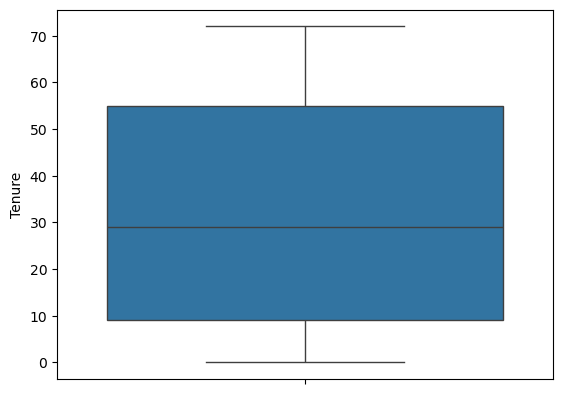

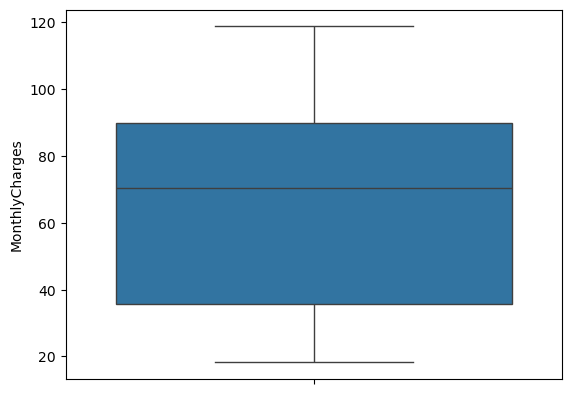

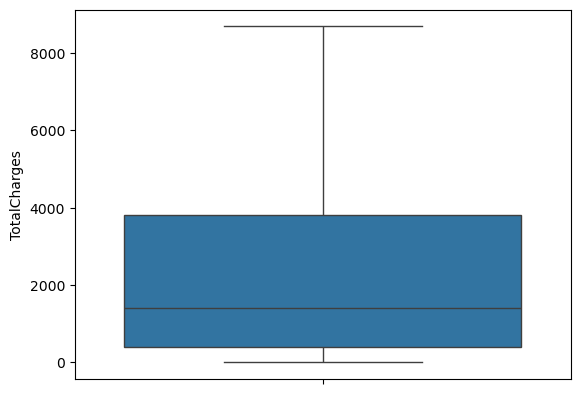

In [115]:
for col in num_cols: 
    sns.boxplot(df[col]) 
    plt.show() 
    

No outlier has been detected for the numerical values

## Exploratory data analysis(EDA)

### Univariate Analysis of Numerical columns 

   Churn  Count
0      0   5164
1      1   1857


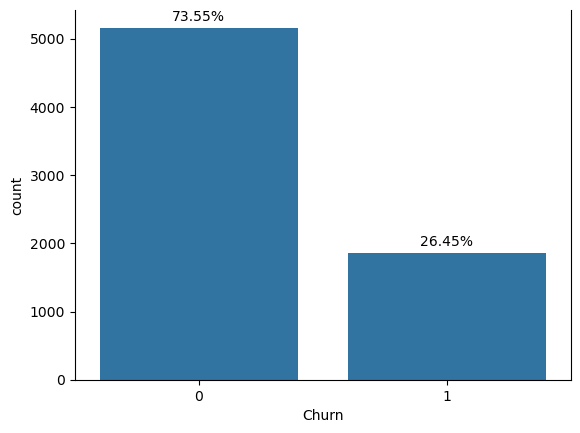

In [116]:
ax=sns.countplot(x=df["Churn"])
rate=df["Churn"].value_counts()
print(rate.reset_index(name='Count'))

for i,v in enumerate(rate):
    percentage=df["Churn"].value_counts(normalize=True)*100
    plt.text(i,v+100,str(round(percentage.iloc[i],2))+"%",ha="center")

for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type == 'top' else spine.set_visible(True)

plt.show()

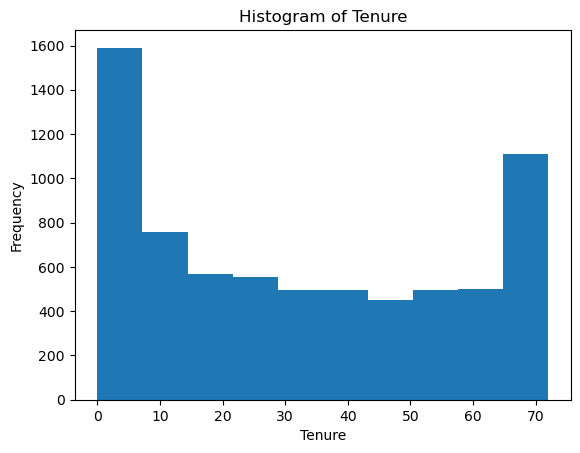

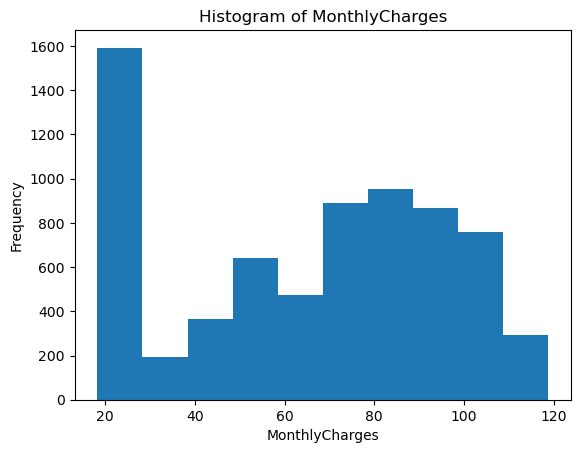

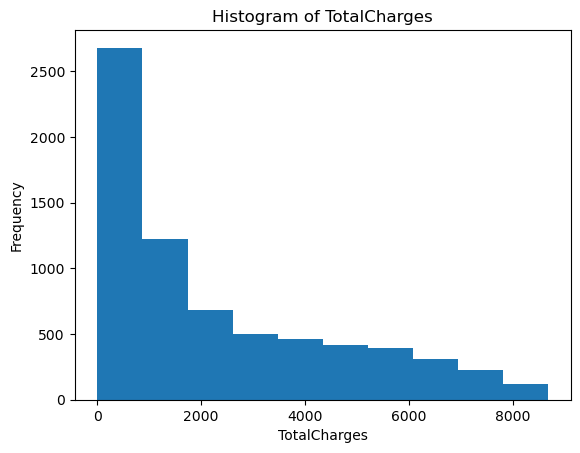

In [117]:
for col in num_cols:
    
    plt.hist(df[col]) 
    plt.title(f"Histogram of {col}") 
    plt.xlabel(col) 
    plt.ylabel("Frequency") 
    plt.show()

# distribution of the tenure have multiple peaks at different intervels
# distribution of the monthly charges most of the customers having lower to mid range and few customers in the higher range. 
# distribution of totalcharges is right skewed distribution ,many customers have low total charges


## Correlation Between Numerical Values

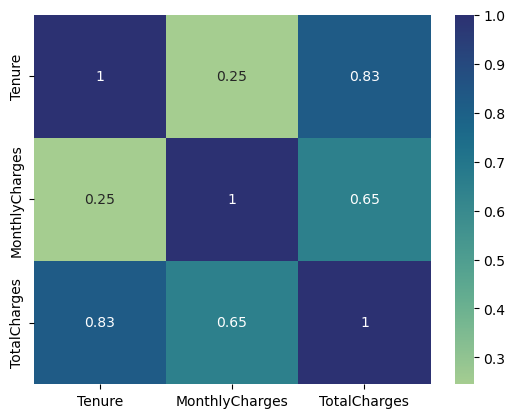

In [118]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='crest')
plt.show()

### Univariate Analysis of categorical columns 

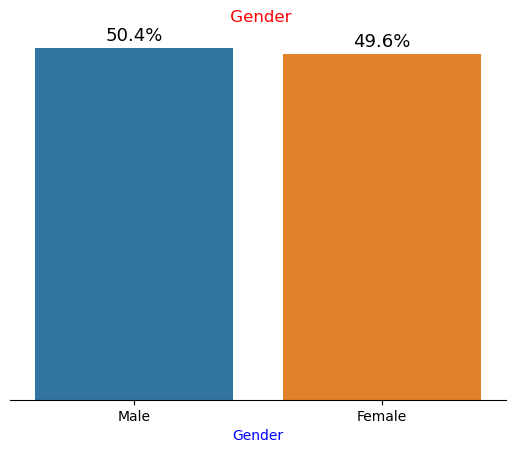

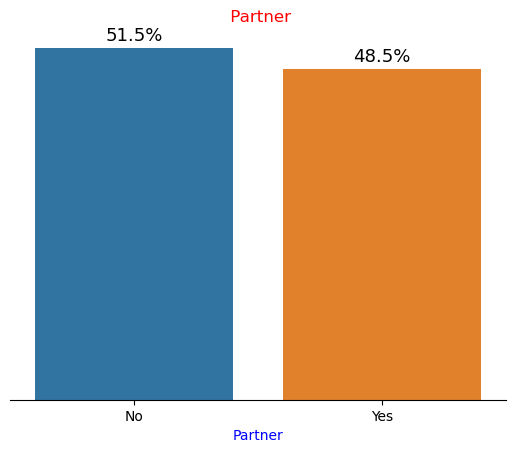

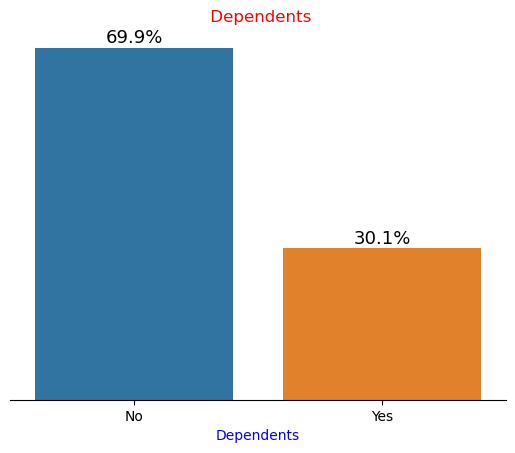

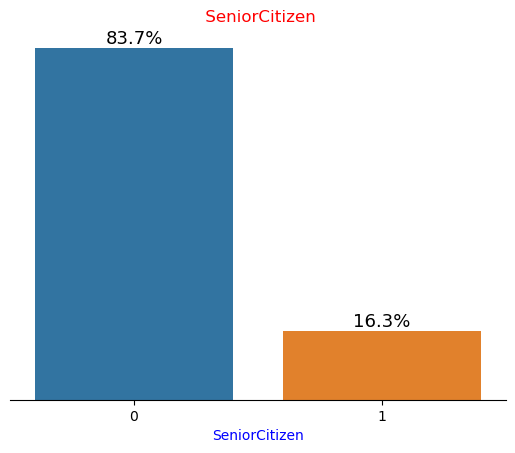

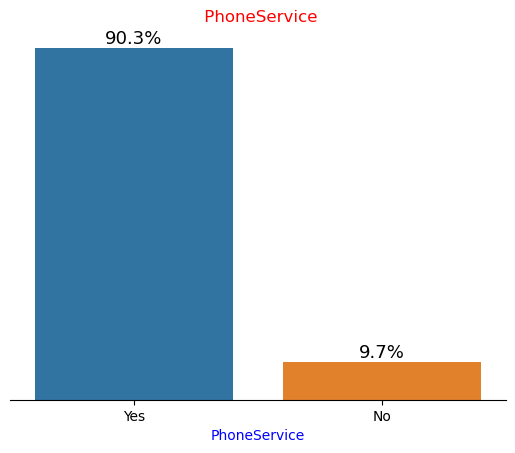

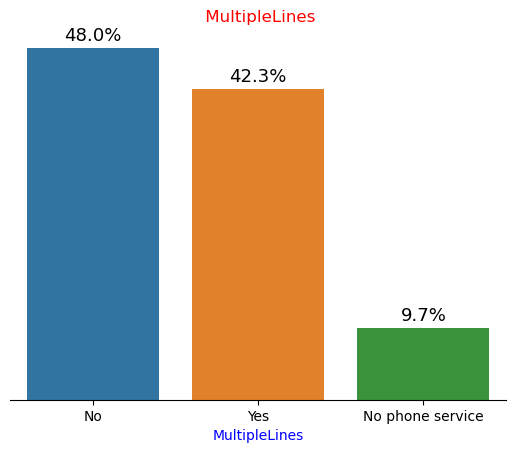

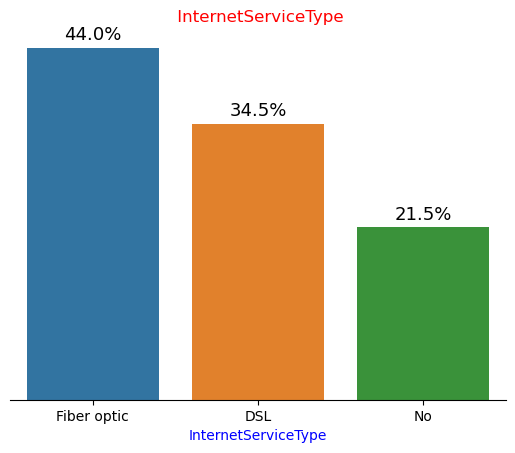

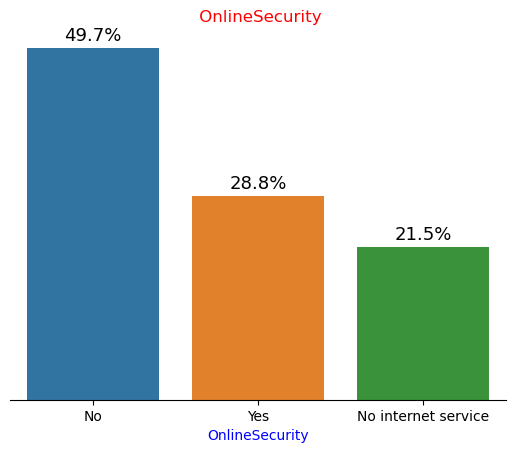

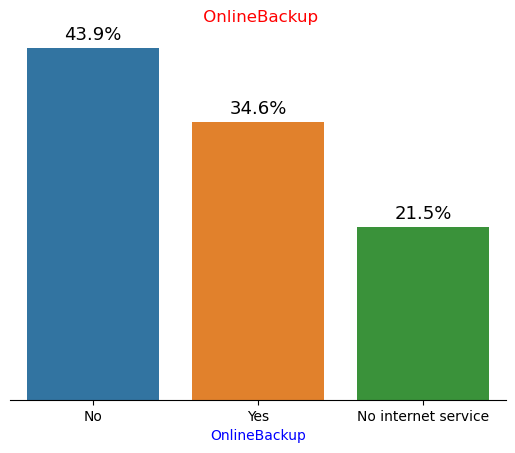

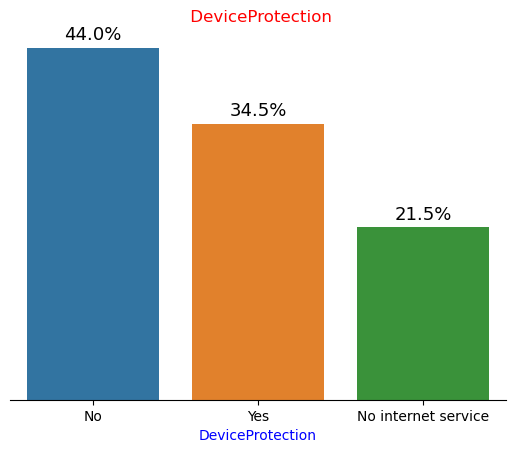

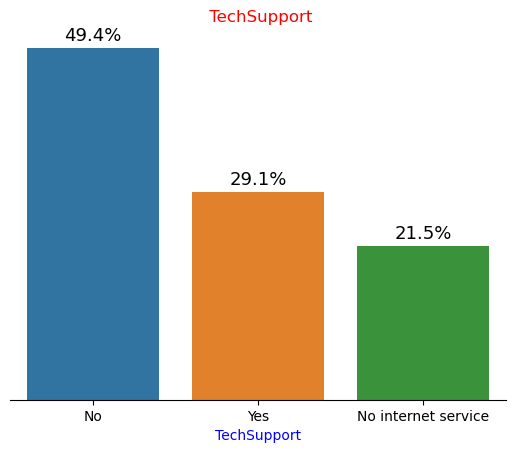

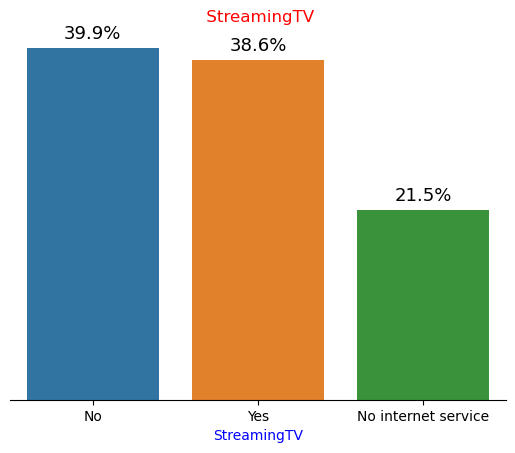

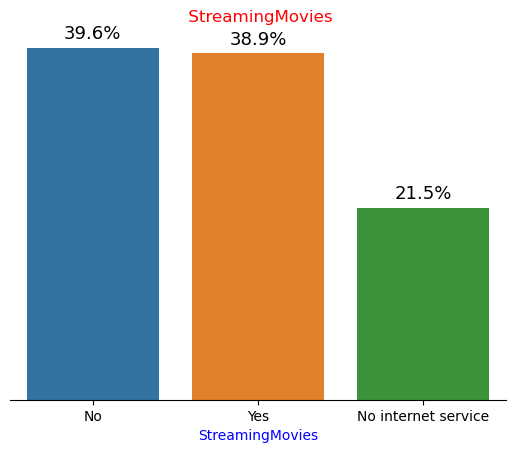

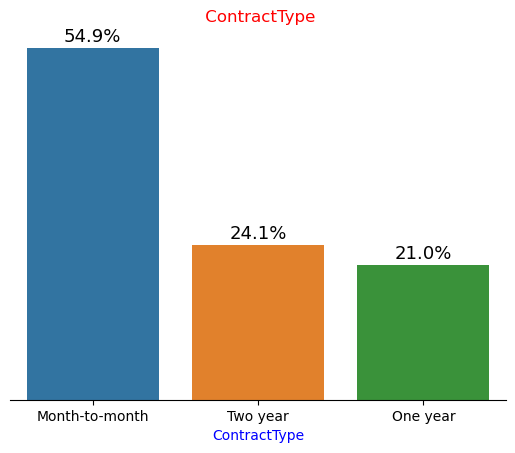

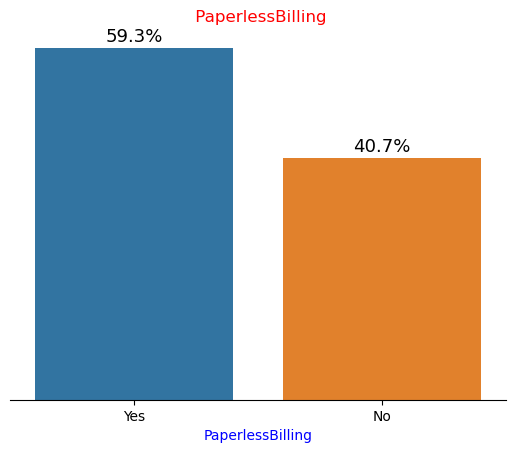

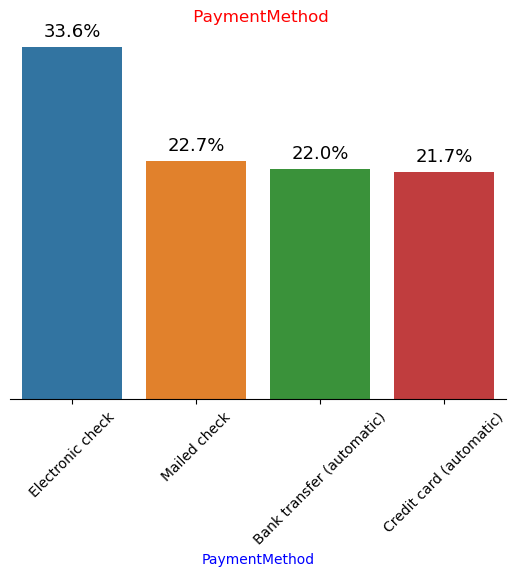

In [119]:
for col in cat_cols:
        rate=df[col].value_counts()/df.shape[0]*100
       # plt.figure(figsize=(8,6))
        sns.barplot(x=rate.index,y=rate.values,hue=rate.index,legend=False) 
        plt.title(f" {col}",color="r") 
        plt.xlabel(col,color="b") 
        plt.xticks(range(0,len(rate.index),1))
        plt.ylabel("Frequency",color="b")
        plt.gca().axes.get_yaxis().set_visible(False)
       
    
        for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
        for i,v in (enumerate(rate)):
            plt.text(i
                ,v+1
                ,f"{v:.1f}%"
                ,fontsize=13
                ,ha='center')
        if col=="PaymentMethod":
            plt.xticks(rotation=45)
        plt.show()


### Bivariate analysis (Categorical features vs churn)

In [120]:
churn_summary = df.groupby('Churn')

In [121]:
def data_labels(ax):
    for bar in ax.patches:
        ax.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.01,str(round(bar.get_height()*100,2))+'%',ha='center')

In [122]:
def categorical_vs_churn_dist(feature,filterFea=''):
    color=["blue","green"]
    if filterFea != '':
        feature_summary = df[df[filterFea]==1].groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        sns.catplot(hue=feature,
                    y='Percentage',
                    data = feature_summary,
                    col='Churn',
                    kind='bar',
                    alpha = 0.6)
        plt.xticks(rotation=45)
        plt.ylim(top=1)

    else:
        feature_summary = churn_summary[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        plt_cat=sns.catplot(x=feature,
                    y='Percentage',
                    data = feature_summary,
                    col='Churn',
                    kind='bar',
                    hue=feature,
                    palette="hls",
                    alpha = 0.5)
        plt.ylim(top=1)
    for i,v in enumerate(feature):
        for ax1,ax2 in plt_cat.axes:
            data_labels(ax1)
            data_labels(ax2)
            
    if feature=="PaymentMethod":
            plt_cat.set_xticklabels(rotation=45)

        
    return plt.show()

Partner  summary: 
     Churn Partner  Percentage
0      0     Yes    0.529241
1      0      No    0.470759
2      1      No    0.639742
3      1     Yes    0.360258


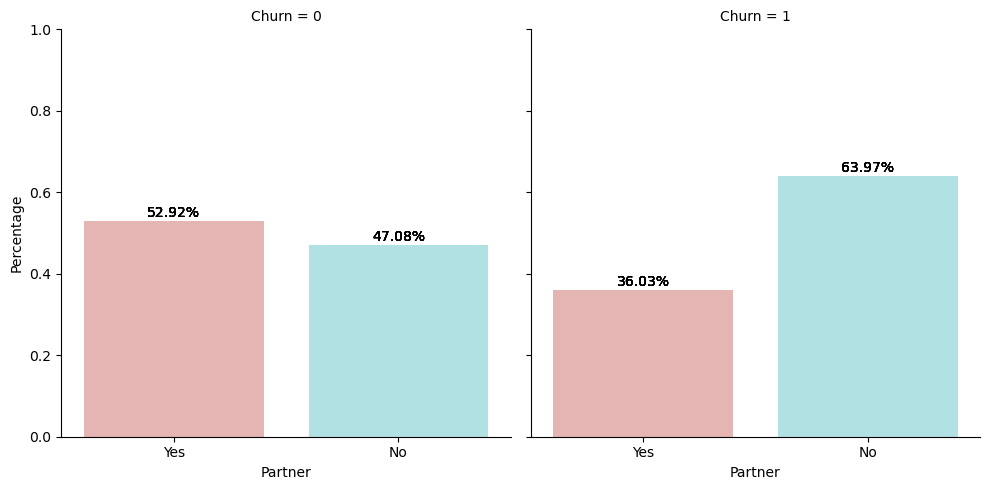

In [123]:
categorical_vs_churn_dist('Partner')

Dependents  summary: 
     Churn Dependents  Percentage
0      0         No    0.654531
1      0        Yes    0.345469
2      1         No    0.824448
3      1        Yes    0.175552


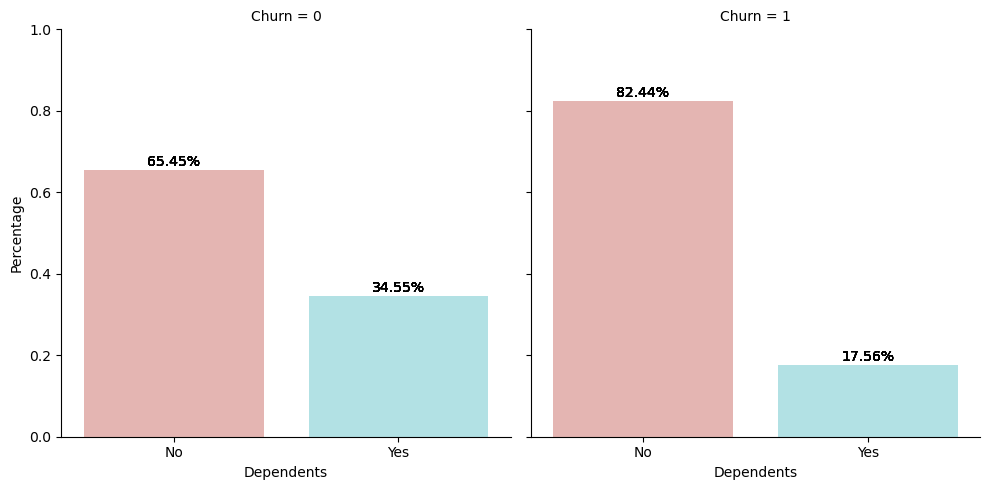

In [124]:
categorical_vs_churn_dist('Dependents')

#### * People who have churned are likely to have no partners or independent

SeniorCitizen  summary: 
     Churn  SeniorCitizen  Percentage
0      0              0    0.871030
1      0              1    0.128970
2      1              0    0.744211
3      1              1    0.255789


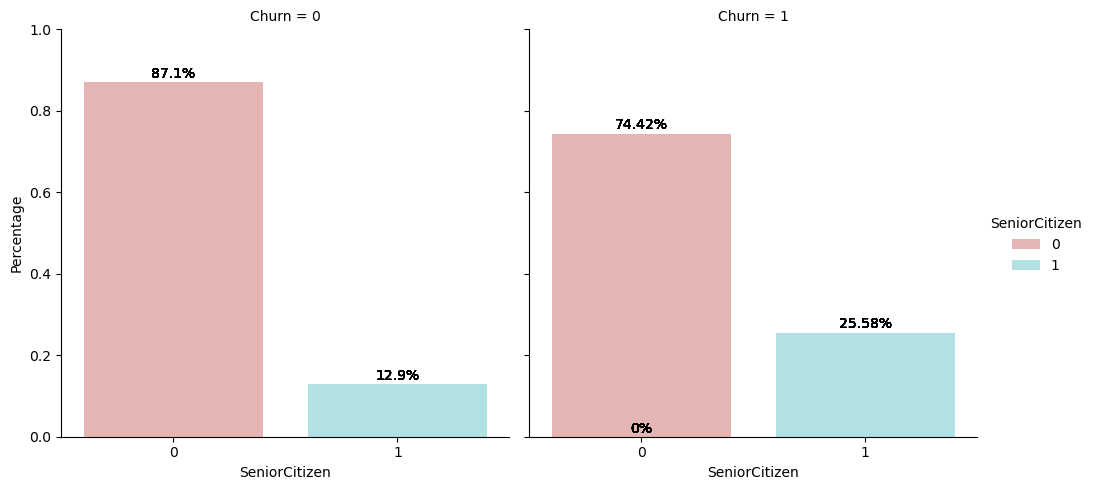

In [125]:
categorical_vs_churn_dist('SeniorCitizen')

#### * Compared to existing Senior citizen customers, the percentage of senior citizens have churned is more.

PhoneService  summary: 
     Churn PhoneService  Percentage
0      0          Yes    0.900852
1      0           No    0.099148
2      1          Yes    0.908454
3      1           No    0.091546


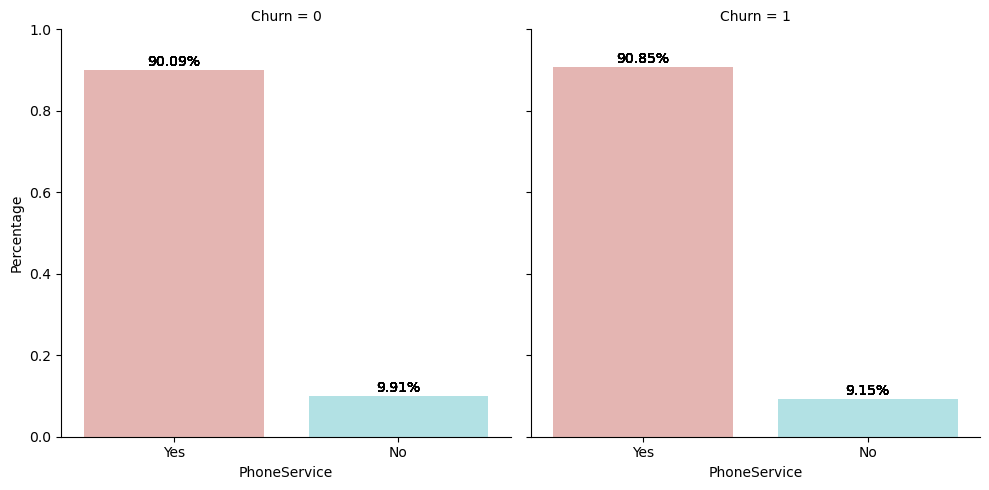

In [126]:
categorical_vs_churn_dist('PhoneService')

#### * 

MultipleLines  summary: 
     Churn     MultipleLines  Percentage
0      0                No    0.490124
1      0               Yes    0.410728
2      0  No phone service    0.099148
3      1               Yes    0.457728
4      1                No    0.450727
5      1  No phone service    0.091546


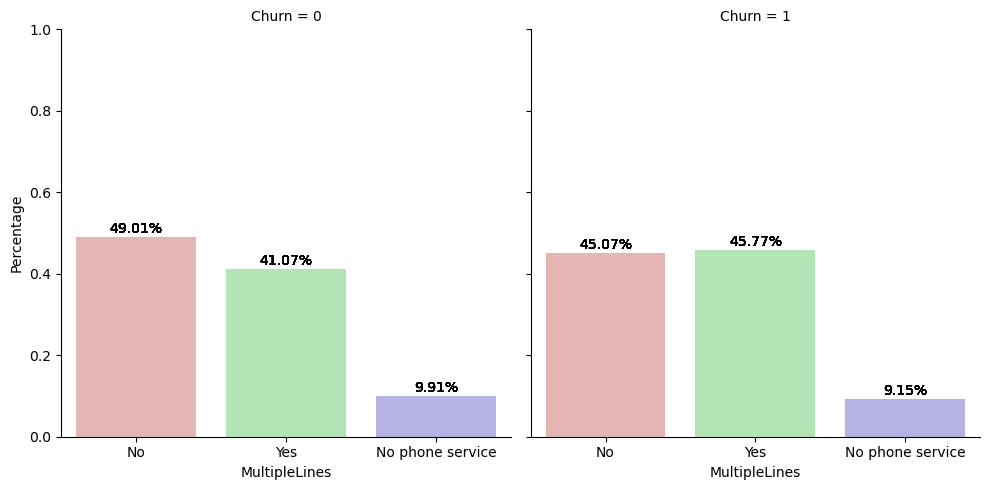

In [127]:
categorical_vs_churn_dist('MultipleLines')

InternetServiceType  summary: 
     Churn InternetServiceType  Percentage
0      0                 DSL    0.379938
1      0         Fiber optic    0.348373
2      0                  No    0.271689
3      1         Fiber optic    0.695207
4      1                 DSL    0.246096
5      1                  No    0.058697


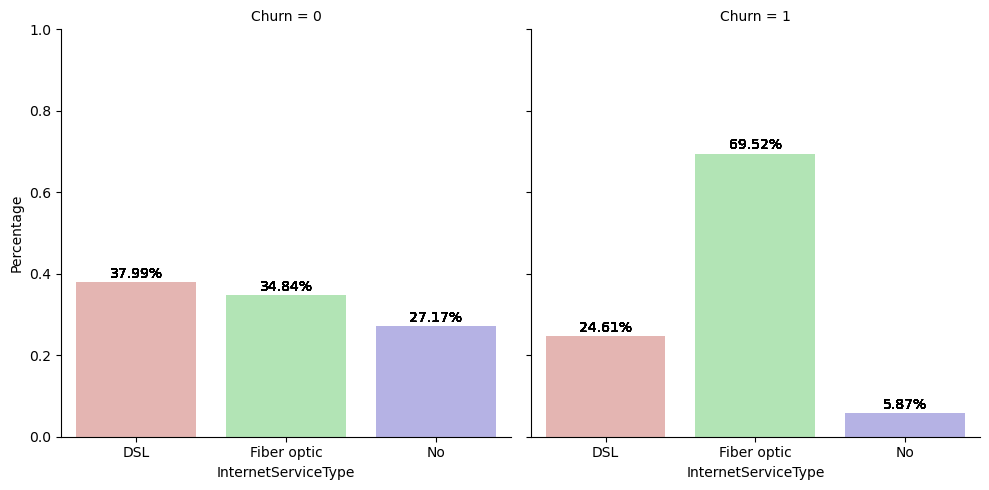

In [128]:
categorical_vs_churn_dist('InternetServiceType')

OnlineSecurity  summary: 
     Churn       OnlineSecurity  Percentage
0      0                   No    0.394462
1      0                  Yes    0.333850
2      0  No internet service    0.271689
3      1                   No    0.782445
4      1                  Yes    0.158858
5      1  No internet service    0.058697


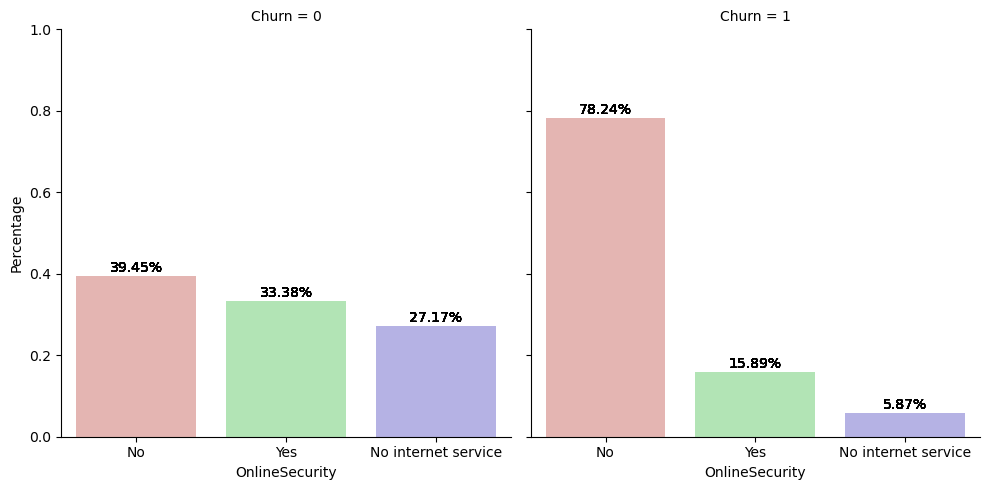

In [129]:
categorical_vs_churn_dist('OnlineSecurity')

OnlineBackup  summary: 
     Churn         OnlineBackup  Percentage
0      0                  Yes    0.369094
1      0                   No    0.359218
2      0  No internet service    0.271689
3      1                   No    0.659666
4      1                  Yes    0.281637
5      1  No internet service    0.058697


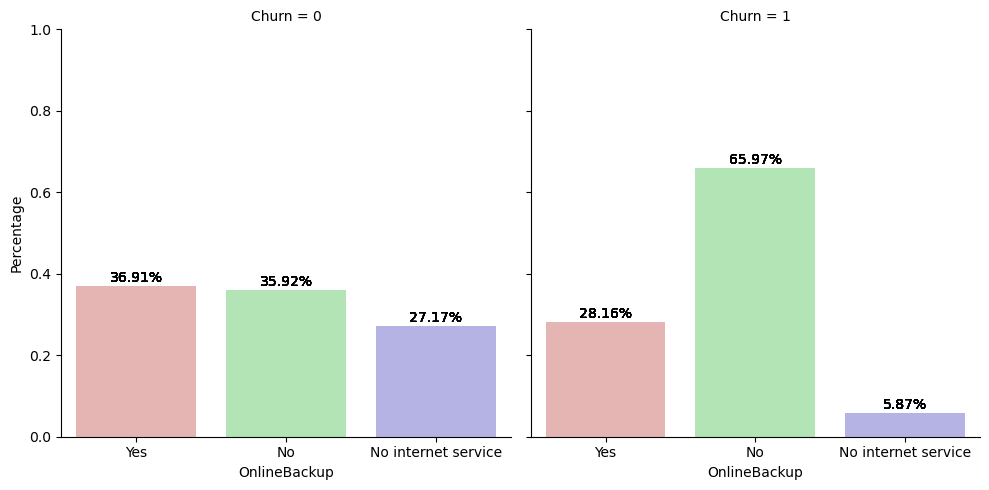

In [130]:
categorical_vs_churn_dist('OnlineBackup')

DeviceProtection  summary: 
     Churn     DeviceProtection  Percentage
0      0                   No    0.364833
1      0                  Yes    0.363478
2      0  No internet service    0.271689
3      1                   No    0.647819
4      1                  Yes    0.293484
5      1  No internet service    0.058697


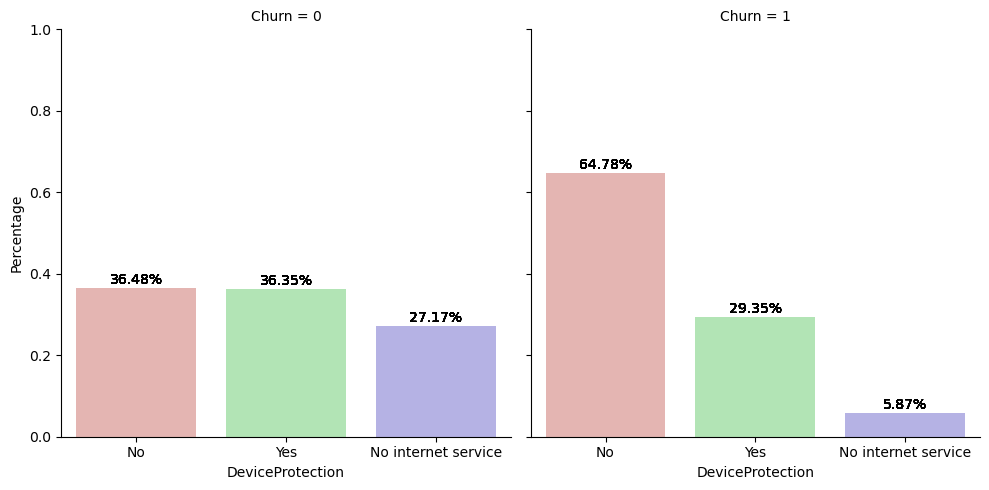

In [131]:
categorical_vs_churn_dist('DeviceProtection')

TechSupport  summary: 
     Churn          TechSupport  Percentage
0      0                   No    0.392525
1      0                  Yes    0.335786
2      0  No internet service    0.271689
3      1                   No    0.774367
4      1                  Yes    0.166936
5      1  No internet service    0.058697


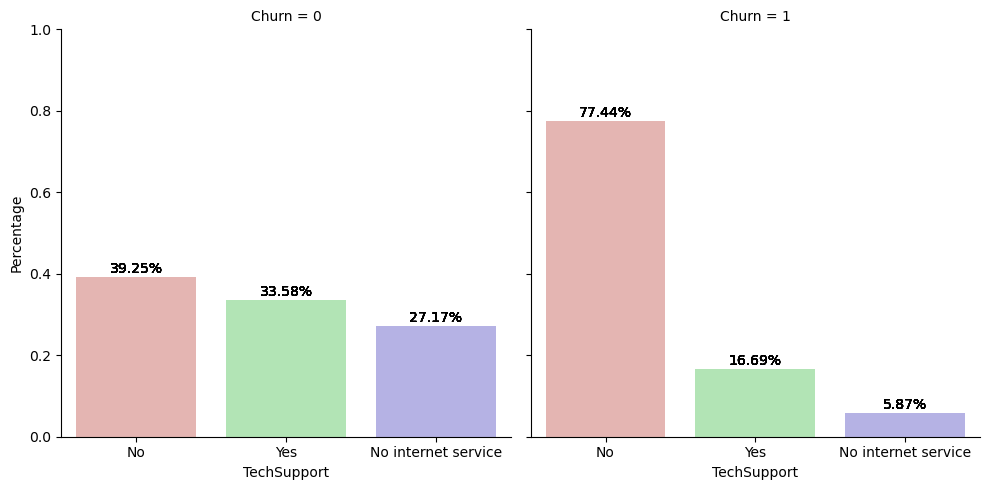

In [132]:
categorical_vs_churn_dist('TechSupport')

StreamingTV  summary: 
     Churn          StreamingTV  Percentage
0      0                  Yes    0.366576
1      0                   No    0.361735
2      0  No internet service    0.271689
3      1                   No    0.502962
4      1                  Yes    0.438341
5      1  No internet service    0.058697


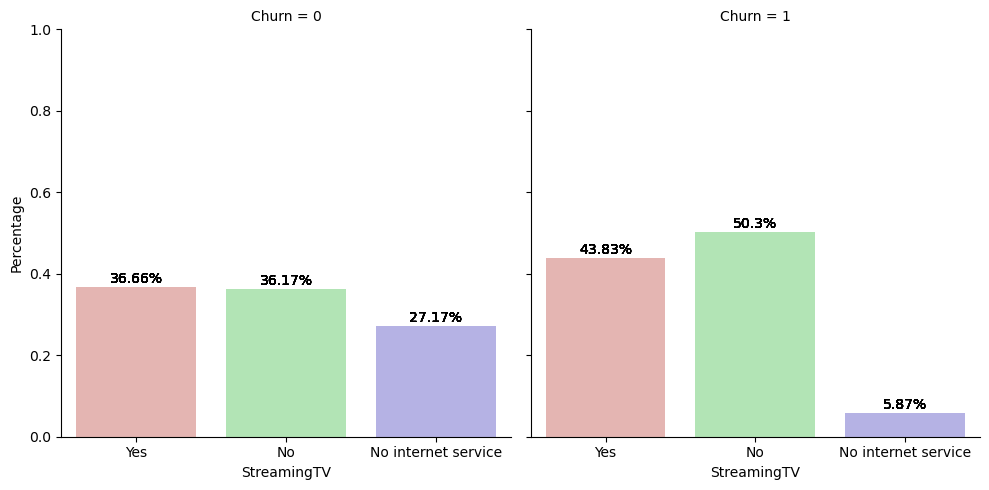

In [133]:
categorical_vs_churn_dist('StreamingTV')

StreamingMovies  summary: 
     Churn      StreamingMovies  Percentage
0      0                  Yes    0.370643
1      0                   No    0.357668
2      0  No internet service    0.271689
3      1                   No    0.500808
4      1                  Yes    0.440495
5      1  No internet service    0.058697


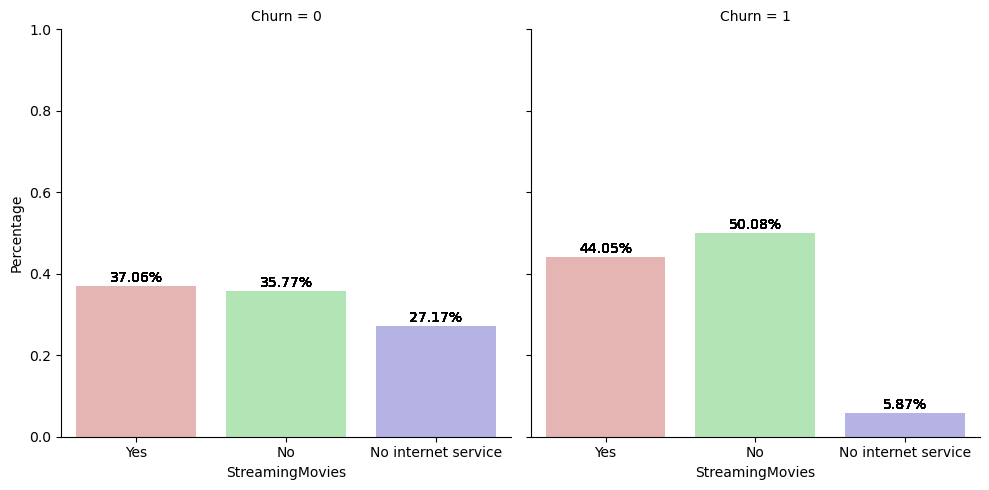

In [134]:
categorical_vs_churn_dist('StreamingMovies')

ContractType  summary: 
     Churn    ContractType  Percentage
0      0  Month-to-month    0.427963
1      0        Two year    0.318939
2      0        One year    0.253098
3      1  Month-to-month    0.884760
4      1        One year    0.089391
5      1        Two year    0.025848


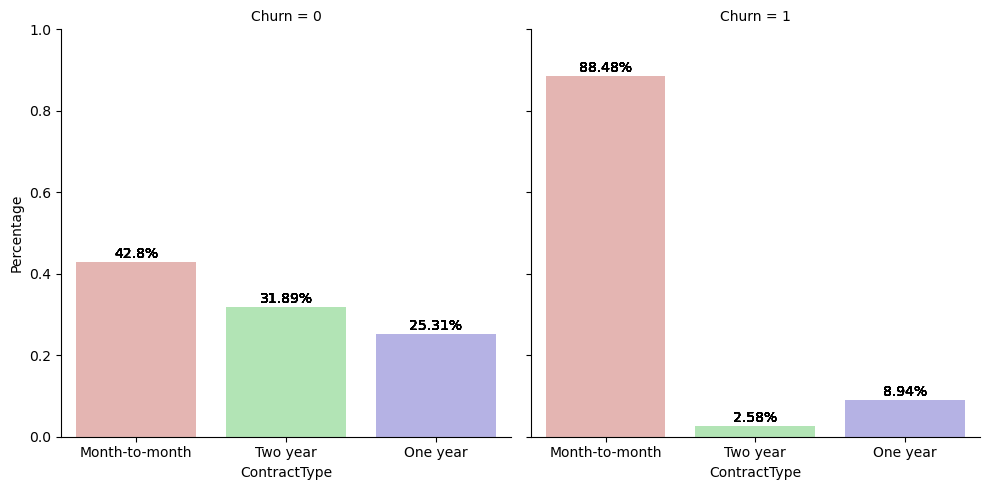

In [135]:
categorical_vs_churn_dist('ContractType')

#### * customers having month to month subscription are more likely to churn because of no contract.

PaperlessBilling  summary: 
     Churn PaperlessBilling  Percentage
0      0              Yes    0.536406
1      0               No    0.463594
2      1              Yes    0.749058
3      1               No    0.250942


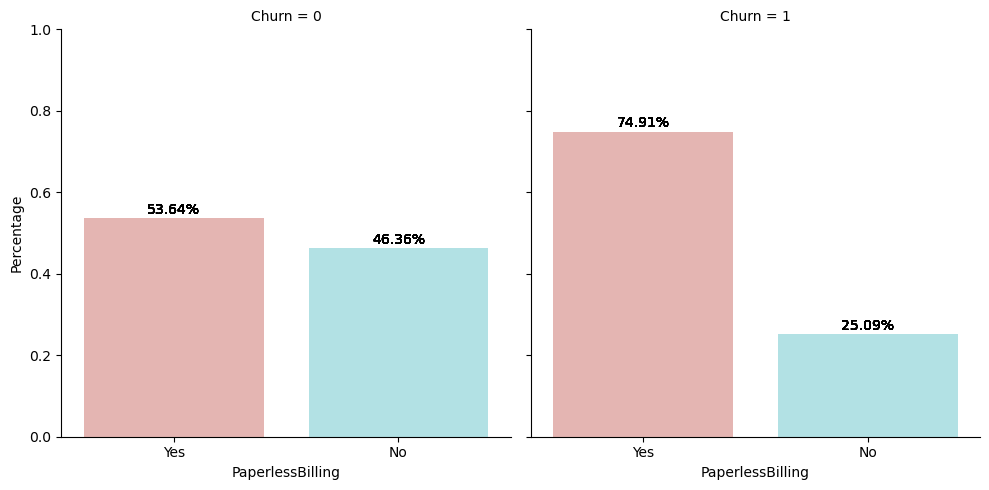

In [136]:
categorical_vs_churn_dist('PaperlessBilling')

PaymentMethod  summary: 
     Churn              PaymentMethod  Percentage
0      0           Electronic check    0.250581
1      0               Mailed check    0.250581
2      0    Credit card (automatic)    0.249806
3      0  Bank transfer (automatic)    0.249032
4      1           Electronic check    0.573506
5      1               Mailed check    0.162628
6      1  Bank transfer (automatic)    0.138934
7      1    Credit card (automatic)    0.124933


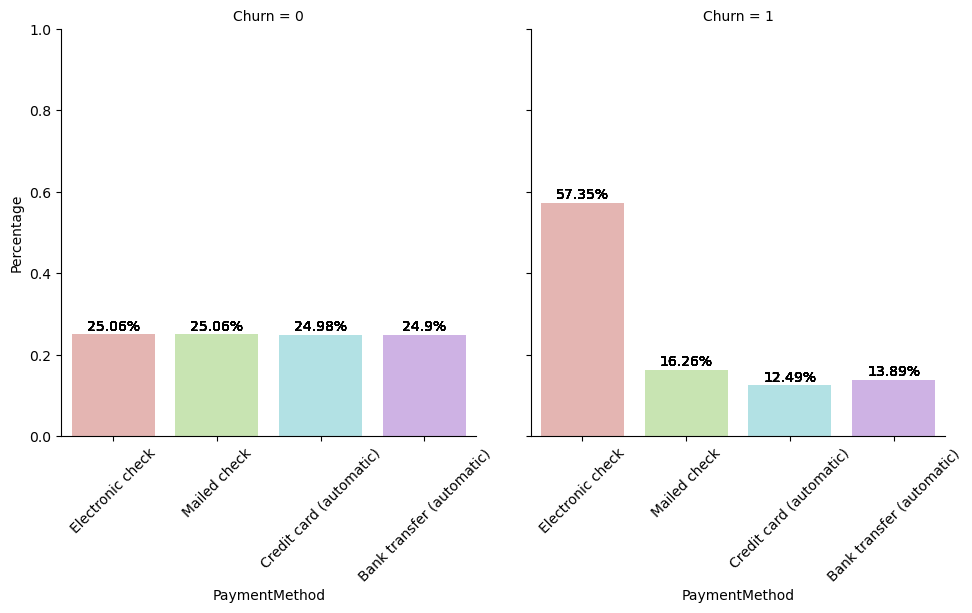

In [137]:
categorical_vs_churn_dist('PaymentMethod')

#### * Customers using electronic check are more likely to churn.

## Numerical Distribution Graph

### Distribution of Tenure with respect to Churn

In [138]:
def numerical_distribution(feature):
    fig=plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    ax=sns.kdeplot(df[feature],fill=True,label='Tenure')
    plt.title(feature +" Distribution")

    plt.subplot(2,1,2)
    ax=sns.kdeplot(df.loc[(df["Churn"]=="Yes"),feature],label="Churn",color='g',fill=True)
    ax=sns.kdeplot(df.loc[(df['Churn']=="No") ,feature],label="No Churn",color='b',fill=True,alpha=0.1)  
    plt.title(feature +" Distribution: Churn vs No Churn")
    
    plt.legend()
    plt.show()

C:\Users\dssm3\AppData\Local\Temp\ipykernel_13748\3580790107.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


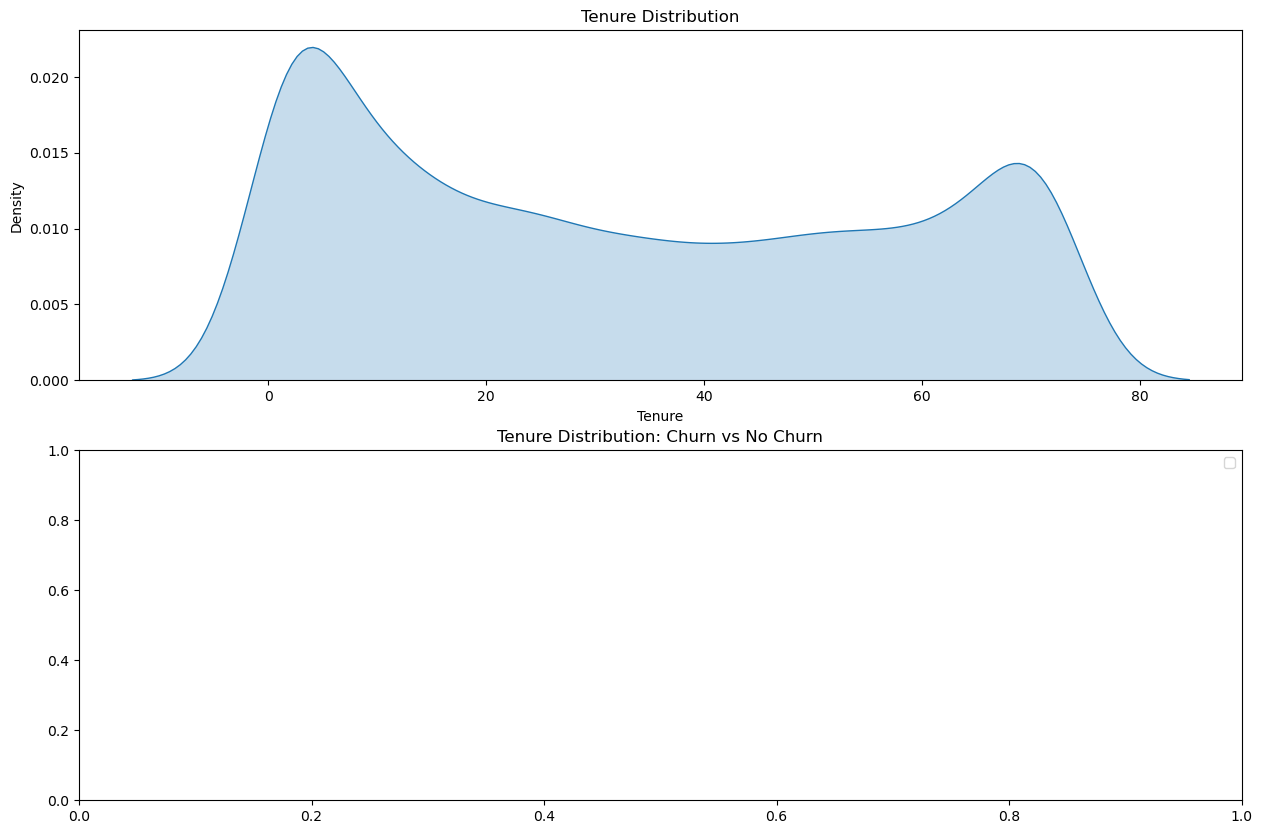

In [139]:
numerical_distribution('Tenure')

#### * Customers who has churned are more likely to have tenure around year.

C:\Users\dssm3\AppData\Local\Temp\ipykernel_13748\3580790107.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


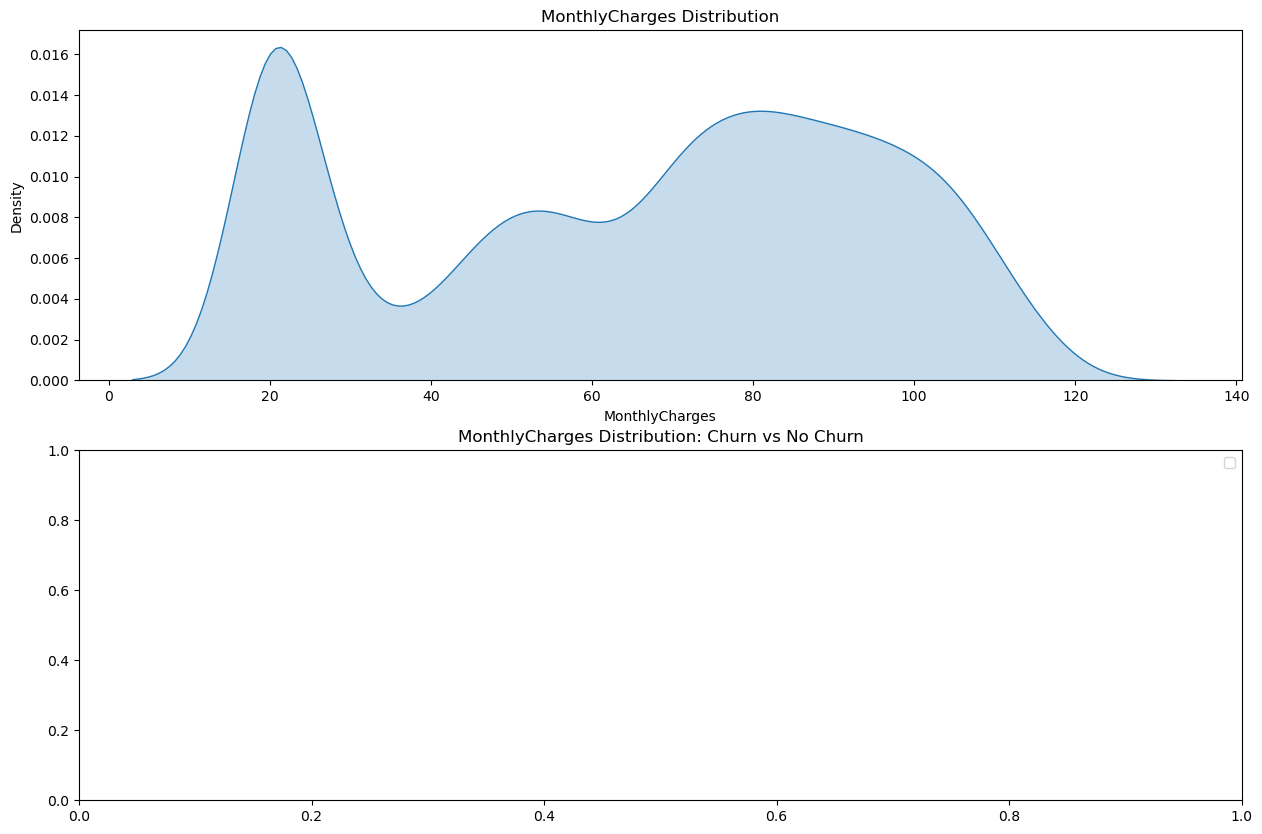

In [140]:
numerical_distribution('MonthlyCharges')

#### * Customers who has churned have monthly charges around 80-100 USD.

## Finding relation between Monthly Charges and Tenure

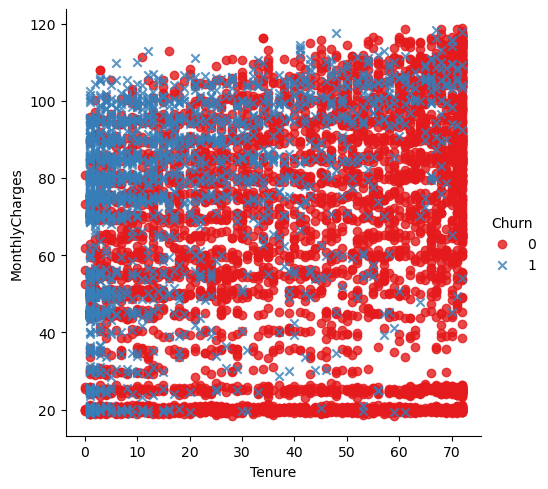

In [141]:
sns.lmplot(x='Tenure',y='MonthlyCharges',data=df
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() 

#### * People who tend to have short tenure and high monthly charges are more likely to churn

## Feature Engineering

In [142]:
def InternetService(row):
    if( (row["OnlineSecurity"]=='Yes')| (row['OnlineBackup']=='Yes')|(row['DeviceProtection']=='Yes')|(row ['TechSupport']=='Yes')|(row[ 'StreamingTV']=='Yes')|(row[ 'StreamingMovies']=='Yes')):
        return 1
    else: 
        return 0
df["InternetService"]=df.apply(lambda row: InternetService(row),axis=1)

In [143]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


## Encoding and Scaling

### Encoding

### Apply onehot encoder for categorical features 

In [144]:
cat_onehot=pd.get_dummies(df[cat_cols],dtype=int,drop_first=True)
cat_onehot

,SeniorCitizen,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetServiceType_Fiber optic,InternetServiceType_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,ContractType_One year,ContractType_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,0,1,1,1,0,1,1,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### Scaling

### Apply standard scalar to numerical features

In [145]:
std_scal=StandardScaler()
df[num_cols]=std_scal.fit_transform(df[num_cols])
df[num_cols].head()

,Tenure,MonthlyCharges,TotalCharges
0,-1.282728,-1.164135,-0.995686
1,0.062387,-0.262811,-0.175262
2,-1.241967,-0.365914,-0.961142
3,0.510759,-0.750058,-0.196769
4,-1.241967,0.194503,-0.941951


In [146]:
# concat the encoded features and scaled features 
final_df=pd.concat([df[num_cols],cat_onehot],axis=1) 
final_df

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,ContractType_One year,ContractType_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.282728,-1.164135,-0.995686,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.062387,-0.262811,-0.175262,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.241967,-0.365914,-0.961142,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.510759,-0.750058,-0.196769,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.241967,0.194503,-0.941951,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.345224,0.663458,-0.130704,0,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,1.611307,1.275428,2.239445,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,-0.875118,-1.172450,-0.856011,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,-1.160445,0.317562,-0.873592,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [147]:
df=pd.concat([final_df,df["Churn"]],axis=1) 
df

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,ContractType_One year,ContractType_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.282728,-1.164135,-0.995686,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.062387,-0.262811,-0.175262,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.241967,-0.365914,-0.961142,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.510759,-0.750058,-0.196769,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.241967,0.194503,-0.941951,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.345224,0.663458,-0.130704,0,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,1.611307,1.275428,2.239445,0,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,-0.875118,-1.172450,-0.856011,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,-1.160445,0.317562,-0.873592,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


## Model Imbalance

   Churn  Count
0      0   5164
1      1   1857


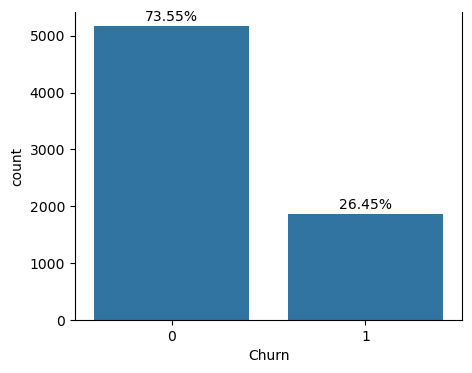

In [148]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["Churn"])
rate=df["Churn"].value_counts()
print(rate.reset_index(name='Count'))

for i,v in enumerate(rate):
    percentage=df["Churn"].value_counts(normalize=True)*100
    plt.text(i,v+100,str(round(percentage.iloc[i],2))+"%",ha="center")

for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type == 'top' else spine.set_visible(True)
plt.show()

#### * Here our target value is imbalanced. Hence we have to upsample our data.

In [149]:
X=df.drop("Churn",axis=1)
y=df["Churn"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [150]:
#smote
sm=SMOTE(random_state=42,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [151]:
#downsample
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X,y)


In [152]:
#upsample
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_train_ros,y_train_ros=ros.fit_resample(X,y)

In [153]:
print("Original Train dataset:", X_train.shape,y_train.shape)
print("Upsampled Train dataset using smote:", X_train_sm.shape,y_train_sm.shape)
print("Upsampled Train dataset RandomOverSampler:", X_train_ros.shape,y_train_ros.shape)
print("Upsampled Train dataset RandomUnderSampler:", X_train_rus.shape,y_train_rus.shape)

Original Train dataset: (5616, 30) (5616,)
Upsampled Train dataset using smote: (8222, 30) (8222,)
Upsampled Train dataset RandomOverSampler: (10328, 30) (10328,)
Upsampled Train dataset RandomUnderSampler: (3714, 30) (3714,)


## Logistic Regression

In [154]:
log_reg = LogisticRegression()
log_reg.fit(X_train_sm,y_train_sm)
y_pred_sm= log_reg.predict(X_test)

In [155]:
#down and up
log_reg.fit(X_train_ros,y_train_ros)
y_pred_ros=log_reg.predict(X_test)

log_reg.fit(X_train_rus,y_train_rus)
y_pred_rus=log_reg.predict(X_test)

#original data
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)


In [156]:
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy of the predicted model using original data :",accuracy)
accuracy = accuracy_score(y_test,y_pred_sm)
print("The accuracy of the predicted model using smote :",accuracy)
accuracy_ros = accuracy_score(y_test,y_pred_ros)
print("The accuracy of the predicted model using over:",accuracy_ros)
accuracy_rus= accuracy_score(y_test,y_pred_rus)
print("The accuracy of the predicted model using under:",accuracy_rus)

The accuracy of the predicted model using original data : 0.7935943060498221
The accuracy of the predicted model using smote : 0.7551601423487544
The accuracy of the predicted model using over: 0.7437722419928826
The accuracy of the predicted model using under: 0.7395017793594306


#### * Since the accuracy score after sampling is high for smote, we are proceeding with it.

In [157]:
accuracy = accuracy_score(y_test,y_pred_sm)
print("The accuracy of the predicted model is :",accuracy)

The accuracy of the predicted model is : 0.7551601423487544


In [158]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1053
           1       0.51      0.75      0.60       352

    accuracy                           0.76      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.76      0.77      1405



## Decision Tree

In [159]:
dtf=DecisionTreeClassifier(random_state=42)
dtf.fit(X_train_sm,y_train_sm)
y_pred_dtf=dtf.predict(X_test)
accuracy_dtf = accuracy_score(y_pred_dtf,y_test)

print("The accuracy score for Decision Tree using smote :",accuracy_dtf)

The accuracy score for Decision Tree using smote : 0.7145907473309608


In [160]:
print(classification_report(y_pred_dtf,y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       972
           1       0.55      0.44      0.49       433

    accuracy                           0.71      1405
   macro avg       0.66      0.64      0.65      1405
weighted avg       0.70      0.71      0.71      1405



## Random Forest

In [161]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_sm,y_train_sm)
y_pred_rf=rf.predict(X_test)

print("The accuracy score using random forest for the smote model is:",accuracy_score(y_pred_rf,y_test))

The accuracy score using random forest for the smote model is: 0.7743772241992882


In [162]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       984
           1       0.65      0.54      0.59       421

    accuracy                           0.77      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.77      0.77      0.77      1405



* The accuracy increased with Random Forest.

### KNN

In [163]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.7103202846975089


In [164]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.7437722419928826


In [165]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.7103202846975089


In [166]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.7494661921708186


In [167]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1057
           1       0.49      0.50      0.50       348

    accuracy                           0.75      1405
   macro avg       0.66      0.67      0.67      1405
weighted avg       0.75      0.75      0.75      1405



In [168]:
import pickle

# Save the trained Random Forest model
with open("churn_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved as churn_model.pkl")


Model saved as churn_model.pkl


In [169]:
# Load the saved model
with open("churn_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))

Accuracy of loaded model: 0.7743772241992882
